In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

# DEBUG
pd.set_option("display.max_rows", None)

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

# load csv file
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

# ignore the first two columns ("Timestamp" and "Name")
question_columns = list(df.columns.values[2:12])

# replace the column names with a shorter one for convenience
question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

def get_question_info(df, question_num=1):
    """Compute the polarity and compound scores of the answers."""
    # drop na values
    vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
    for item in vals_to_drop:
        df.loc[df[f"Q{question_num}"] == item] = pd.NA
    df.dropna(inplace=True)

    question_df = df[[f"Q{question_num}", f"Q{question_num}_label"]].copy()
    question_df["polarity_scores"] = question_df.iloc[:,0].apply(lambda answer: sia.polarity_scores(answer))
    question_df["neg"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
    question_df["neu"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
    question_df["pos"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
    question_df["compound"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
    question_df["compound_score"] = question_df["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

    return question_df

def process_dataframe_metrics(df, question_num=1):
    print("Accuracy Score:", accuracy_score(df[f"Q{question_num}_label"], df["compound_score"]))
    print("Classification Report:\n", classification_report(df[f"Q{question_num}_label"], df["compound_score"], zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(df[f"Q{question_num}_label"], df["compound_score"]))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hello\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
QUESTION = 1
q1_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q1_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q1_df

Accuracy Score: 0.8717948717948718
Classification Report:
               precision    recall  f1-score   support

         neg       0.92      0.63      0.75        19
         neu       1.00      0.60      0.75         5
         pos       0.85      0.98      0.91        54

    accuracy                           0.87        78
   macro avg       0.93      0.74      0.80        78
weighted avg       0.88      0.87      0.86        78

Confusion Matrix:
 [[12  0  7]
 [ 0  3  2]
 [ 1  0 53]]

 Are you satisfied with your course? Why do you feel like it?


,Q1,Q1_label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it helps me peak my interests in ...",pos,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.000,0.622,0.378,0.7430,pos
1,Yes because I am interested at my course.,pos,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597,pos
2,Yes! Because I love what I do.,pos,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",0.000,0.294,0.706,0.8016,pos
3,"I feel that it is lacking, with the increase o...",neg,"{'neg': 0.129, 'neu': 0.827, 'pos': 0.044, 'co...",0.129,0.827,0.044,-0.5267,neg
4,"Yes, because it is my passion and I am curious...",pos,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.7906,pos
5,Im satisfied with my course. My knowledge lear...,pos,"{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...",0.000,0.749,0.251,0.6908,pos
6,"Yes, I am satisfied. It is very fun learning n...",pos,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...",0.000,0.569,0.431,0.8439,pos
7,No. Because I do not have any access to labora...,neg,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.2960,neg
8,Yes. I believe that we have competent and know...,pos,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp...",0.000,0.583,0.417,0.6124,pos
9,Yes. The course I took is in line with my inte...,pos,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.7579,pos


# all answers

In [3]:
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

data = pd.DataFrame(
    {
        "answers": pd.concat(
            [df["Q1"], df["Q2"], df["Q3"], df["Q4"], df["Q5"],
            df["Q6"], df["Q7"], df["Q8"], df["Q9"], df["Q10"]],
            ignore_index=True
        ),
        "label": pd.concat(
            [df["Q1_label"], df["Q2_label"], df["Q3_label"], df["Q4_label"], df["Q5_label"],
            df["Q6_label"], df["Q7_label"], df["Q8_label"], df["Q9_label"], df["Q10_label"]],
            ignore_index=True
        )
    }
)

vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
for item in vals_to_drop:
    data.loc[data["answers"] == item] = pd.NA
data.dropna(inplace=True)

data["polarity_scores"] = data["answers"].apply(lambda answer: sia.polarity_scores(answer))
data["neg"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
data["neu"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
data["pos"] = data["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
data["compound"] = data["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
data["compound_score"] = data["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

print("Accuracy Score:", accuracy_score(data["label"], data["compound_score"]))
print("Classification Report:\n", classification_report(data["label"], data["compound_score"], zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(data["label"], data["compound_score"]))

# data.describe()
# sns.pairplot(data)
# sns.distplot(data["compound"])
data

Accuracy Score: 0.793939393939394
Classification Report:
               precision    recall  f1-score   support

         neg       0.81      0.69      0.74       255
         neu       0.71      0.92      0.80       168
         pos       0.83      0.81      0.82       402

    accuracy                           0.79       825
   macro avg       0.78      0.80      0.79       825
weighted avg       0.80      0.79      0.79       825

Confusion Matrix:
 [[175  25  55]
 [  3 154  11]
 [ 38  38 326]]


,answers,label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it helps me peak my interests in ...",pos,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.000,0.622,0.378,0.7430,pos
1,Yes because I am interested at my course.,pos,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597,pos
2,Yes! Because I love what I do.,pos,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",0.000,0.294,0.706,0.8016,pos
3,"I feel that it is lacking, with the increase o...",neg,"{'neg': 0.129, 'neu': 0.827, 'pos': 0.044, 'co...",0.129,0.827,0.044,-0.5267,neg
4,"Yes, because it is my passion and I am curious...",pos,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.7906,pos
5,Im satisfied with my course. My knowledge lear...,pos,"{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...",0.000,0.749,0.251,0.6908,pos
6,"Yes, I am satisfied. It is very fun learning n...",pos,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...",0.000,0.569,0.431,0.8439,pos
7,No. Because I do not have any access to labora...,neg,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.2960,neg
8,Yes. I believe that we have competent and know...,pos,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp...",0.000,0.583,0.417,0.6124,pos
9,Yes. The course I took is in line with my inte...,pos,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.7579,pos


In [4]:
data.describe()

,neg,neu,pos,compound
count,825.000000,825.000000,825.000000,825.000000
mean,0.093844,0.764921,0.141227,0.141596
std,0.196541,0.240501,0.197362,0.393160
min,0.000000,0.000000,0.000000,-0.865800
25%,0.000000,0.657000,0.000000,-0.077200
50%,0.000000,0.813000,0.071000,0.000000
75%,0.118000,1.000000,0.213000,0.421500
max,1.000000,1.000000,1.000000,0.958700


C:\Users\Hello\AppData\Local\Temp\ipykernel_18416\61933078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[["neg", "neu", "pos", "compound"]])


<Axes: ylabel='Density'>

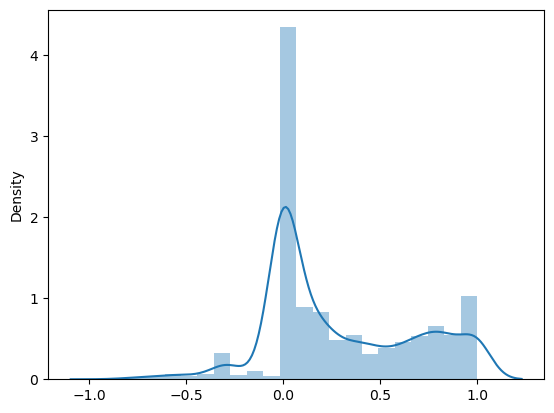

In [5]:
sns.distplot(data[["neg", "neu", "pos", "compound"]])

<Axes: >

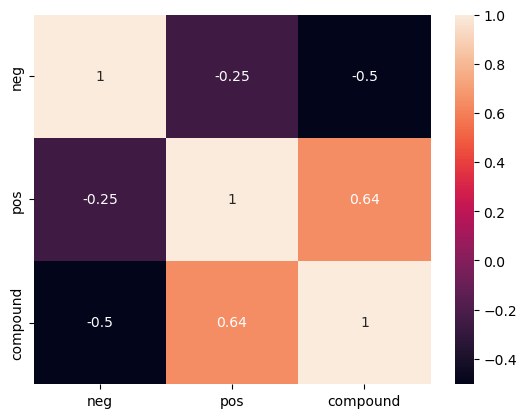

In [6]:
"""
sns.heatmap(data[[
    "neg", "pos", "compound", "neg", "pos", "compound", "neg", "pos", "compound",
    "neg", "pos", "compound", "neg", "pos", "compound", "neg", "pos", "compound",
    "neg", "pos", "compound", "neg", "pos", "compound", "neg", "pos", "compound",
    "neg", "pos", "compound", "neg", "pos", "compound", "neg", "pos", "compound",
]].corr(), annot=True)
"""
sns.heatmap(data[["neg", "pos", "compound"]].corr(), annot=True)

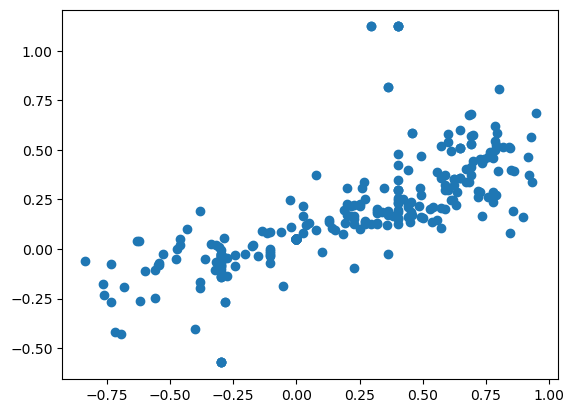

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = data[["neg", "neu", "pos"]]
y = data["compound"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

lr.fit(x_train, y_train)

coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=["Coefficient"])

predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)

C:\Users\Hello\AppData\Local\Temp\ipykernel_18416\5727784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50)


<Axes: xlabel='compound', ylabel='Density'>

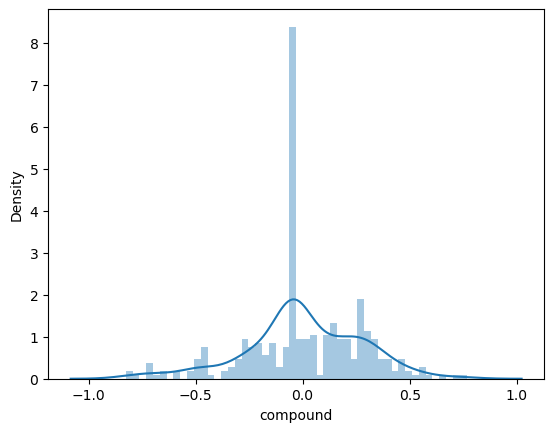

In [8]:
sns.distplot((y_test-predictions), bins=50)

In [9]:
import numpy as np
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  0.2054562781075533
MSE:  0.0746124407150114
RMSE:  0.273152779072466


In [10]:
data["label"].value_counts()

pos    402
neg    255
neu    168
Name: label, dtype: int64

In [11]:
data["compound_score"].value_counts()

pos    392
neu    217
neg    216
Name: compound_score, dtype: int64

In [12]:
type(data["compound_score"].value_counts())

pandas.core.series.Series

In [13]:
data["compound_score"].value_counts().iloc[0]

392

<Axes: >

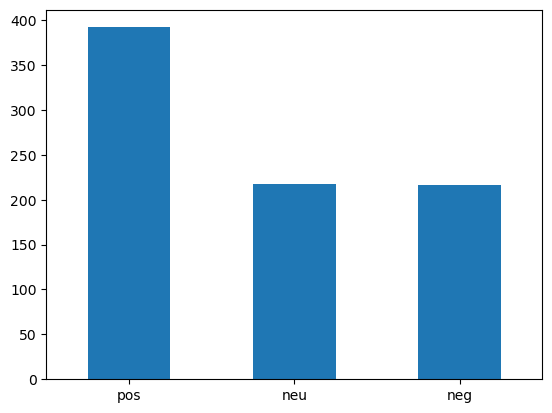

In [14]:
ax = data["compound_score"].value_counts()
# ax = data.plot.bar(x='pos', y='compound_score', rot=0)
ax.plot.bar(x="neu", y="compound_score", rot=0)